#### 5. Improving model predictions through experimentation (hyperparameter tuning)
The first predictions made with the model are called `baseline predictions`.
And the first metrics used is also `baseline metrics`.
To improve baseline metrics:
- data perspective
- model perspective

From data perspective, more data is better to get more trained or learned model and improve data by filling values or finding better way of encoding(turning into numbers) strategy.

From model perspective, determine better model to describe the patterns and improve current model by tuning hyperparameters.

ML finds parameters in the data to get the patterns on its own. Hyperparameters are settings on a model which a user can adjust.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# what are hyperparameters in classifier model, default hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try to tune _n_estimators_, _min_samples_split_, _max_features_, _max_depth_ & _min_samples_leaf_.

Adjusting hyperparameters is experimental process gto get the best ones. There are 3 ways to improve(tune) hyperparameters:
- by hand
- randomly with RandomSearchCV
- exhaustively with GridSearchCV

###### 5.1 Tuning by hand
Hyperparameter tuning introduces validation set in addition to train and test sets.
The process becomes: train the model on _train set_, improve the hyperparameters on _validation set_ and evaluate the model on _test set_.
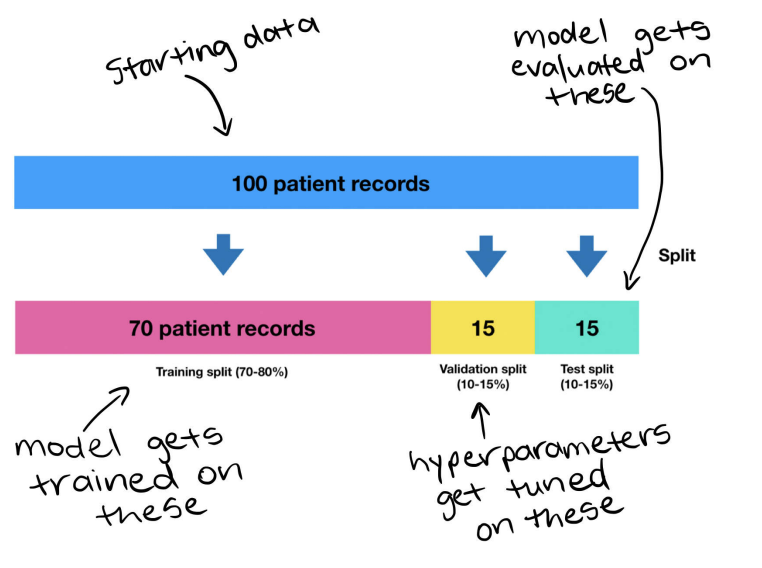


In [3]:
# prepare evaluation function
def evaluate_preds(y_true, y_preds):
    'Performs evaluation comparison on y_true vs. y_preds lables'
    accuracy= accuracy_score(y_true, y_preds)
    precision= precision_score(y_true, y_preds)
    recall= recall_score(y_true, y_preds)
    f1= f1_score(y_true, y_preds)
    metric_dict= {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "F1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    return metric_dict

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
hd= pd.read_csv("heart-disease.csv")
# shuffle the data
hd= hd.sample(frac=1)

X= hd.drop("target", axis= 1)
y= hd["target"]

train_split= round(0.7*len(hd))   # 70% train set
valid_split= round(train_split + 0.15*len(hd))   # 15% validation set
X_train, y_train= X[:train_split], y[:train_split]
X_valid, y_valid= X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test= X[valid_split:], y[valid_split:]

clf= RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds= clf.predict(X_valid)

baseline_metrics= evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'F1': 0.85}

In [6]:
# try to improve the results
np.random.seed(42)
clf2= RandomForestClassifier(n_estimators= 100)
clf2.fit(X_train, y_train)

y_preds2= clf2.predict(X_valid)
clf_2_metrics= evaluate_preds(y_valid, y_preds2)
clf_2_metrics          # slightly worse

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'F1': 0.84}

This method of tuning hyperparameters takes time as it needs building new models

###### 5.2 Hyperparameter tuning using RandomizedSearchCV
to randomly search across different hyperparameters to see which works best and stores details of the best one

In [7]:
# create a grid
grid= {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

these values are made up, but after reading scikit docmentations for RandomForest

there are _6x5x2x3x3= 540_ combinations of these hyperparameters. Hence 540 models to test. Results from each combination can be cross-validated(CV in RandomizedSearchCV)
so possible to use _train_test_split()_

In [16]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
# set n_jobs to -1 to use all cores(processors) of the computer
clf= RandomForestClassifier(n_jobs= -1)
# setup RandomizedSearchCV
rs_clf= RandomizedSearchCV(estimator= clf, param_distributions= grid,
                           n_iter= 20, # try 20 models
                           cv= 5, verbose= 2)  # print 2 output results
# fit
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  14.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

In [17]:
# find the best hyperparameters
rs_clf.best_params_, rs_clf.get_params()

({'n_estimators': 100,
  'min_samples_split': 6,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': 10},
 {'cv': 5,
  'error_score': nan,
  'estimator__bootstrap': True,
  'estimator__ccp_alpha': 0.0,
  'estimator__class_weight': None,
  'estimator__criterion': 'gini',
  'estimator__max_depth': None,
  'estimator__max_features': 'auto',
  'estimator__max_leaf_nodes': None,
  'estimator__max_samples': None,
  'estimator__min_impurity_decrease': 0.0,
  'estimator__min_samples_leaf': 1,
  'estimator__min_samples_split': 2,
  'estimator__min_weight_fraction_leaf': 0.0,
  'estimator__n_estimators': 100,
  'estimator__n_jobs': -1,
  'estimator__oob_score': False,
  'estimator__random_state': None,
  'estimator__verbose': 0,
  'estimator__warm_start': False,
  'estimator': RandomForestClassifier(n_jobs=-1),
  'n_iter': 20,
  'n_jobs': None,
  'param_distributions': {'n_estimators': [10, 100, 200, 500, 1000, 1200],
   'max_depth': [None, 5, 10, 20, 30],
   'max_features': ['auto

In [18]:
# now when rs_clf is called to predict, it uses the best hyperparameters
# make predictions with the best hyperparameters
rs_y_preds= rs_clf.predict(X_test)
# evaluate
rs_metrics= evaluate_preds(y_test, rs_y_preds)
# the results are improved

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


##### 5.3 Hyperparameter tuning with GridSearchCV

RandomizedSearchCV searches across a grid of hyperparameters randomly, based on n_iter combinations.

GridSearchCV searches across a grid of hyperparameters exhaustively.

In [19]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

Based on the `best_params` found in RandomizedSearchCV, create another hyperparameter grid

In [20]:
grid_2= {'n_estimators': [1200, 1500, 2000], 'max_depth': [None, 5, 10],
         'max_features': ['auto', 'sqrt'], 'min_samples_split': [4, 6],
         'min_samples_leaf': [1, 2]}

There are `3*3*2*2*2= 72` model combinations.

In [21]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
X= hd.drop("target", axis= 1)
y= hd["target"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

clf= RandomForestClassifier(n_jobs= -1)

gs_clf= GridSearchCV(estimator= clf, param_grid= grid_2,
                     cv= 5, verbose= 2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

In [22]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [23]:
gs_y_preds= gs_clf.predict(X_test)
gs_metrics= evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


Create a DataFrame to compare different metrics

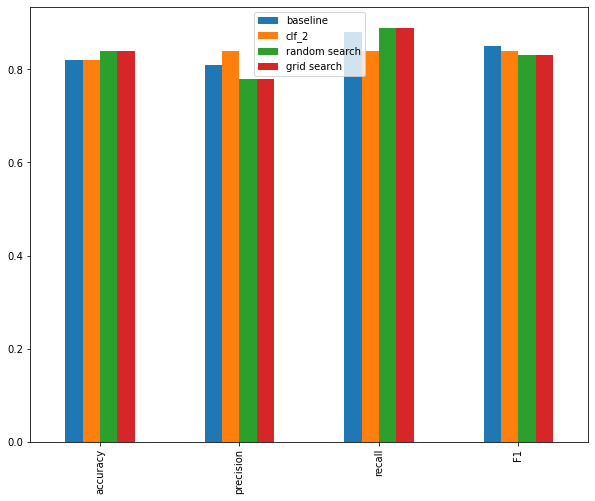

In [24]:
compare_metrics= pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize= (10, 8));

For further improvement in:
- collecting more data: this improves the models ability to get patterns in the data
- try more advanced model: such as XGBoost or CatBoost

#### 6. Saving and loading a trainedML model
##### 6.1 Saving and loading with pickle

In [26]:
import pickle
# save an existing model to a file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) # wb= write binary

In [27]:
# load saved model, rb= read binary
loaded_pickle_model= pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [28]:
# make predictions and evaluate the loaded model
pickle_y_preds= loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'F1': 0.83}

##### 6.2 Saving and loading a model with joblib

In [30]:
from joblib import dump, load
# save a model to a file
dump(gs_clf, filename= "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [33]:
# import the file
loaded_joblib_model= load(filename="gs_random_forest_model_1.joblib")

In [34]:
# make prediction and evaluate
joblib_y_preds= loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'F1': 0.83}

- joblib is more efficient to use as it is more efficient with large numpy array which is what may be contained in a trained/fitted Scikit-Learn models
- either way, they both function fairly similar so deciding on which one to use isn't an issue 